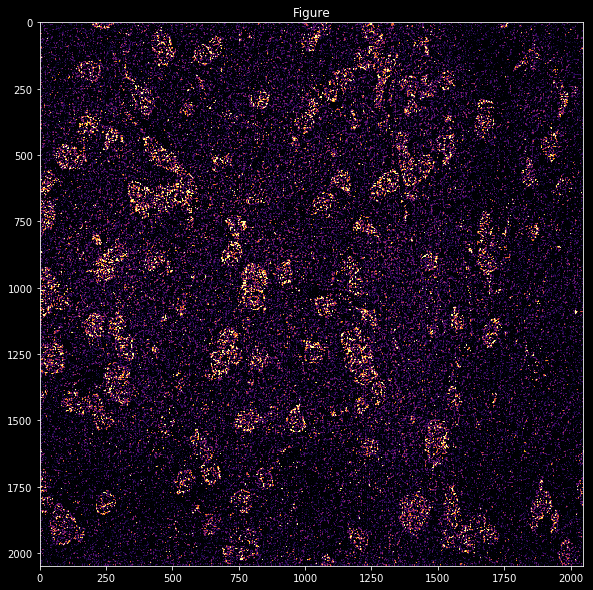

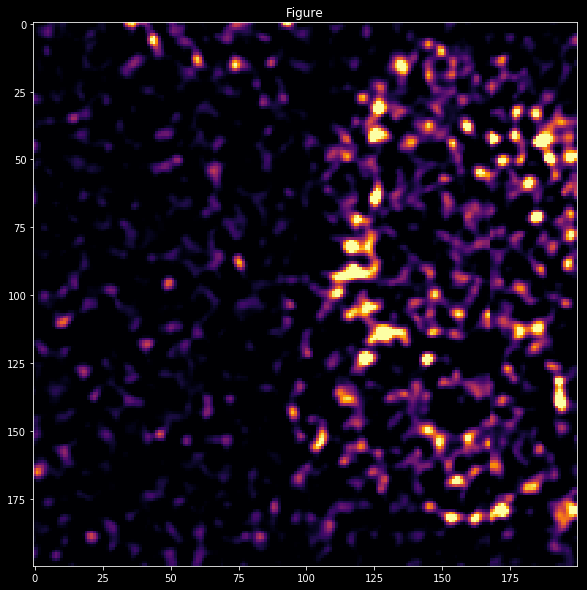

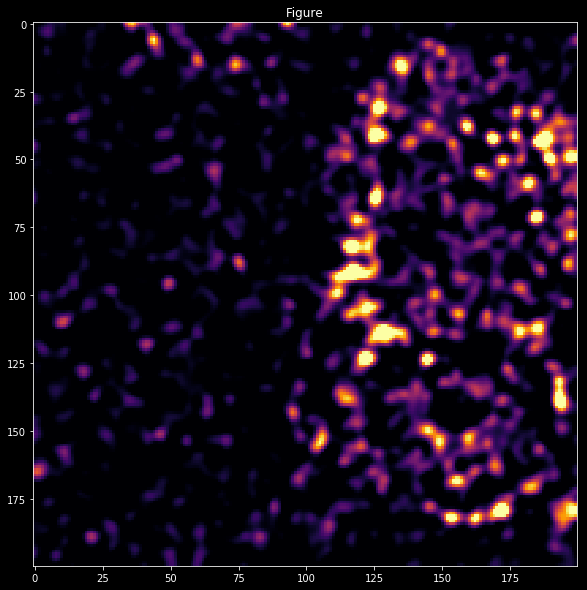

In [27]:
from fish_helpers import *
fishdata_path = '/hybedata/Images/Zach/ZebraFinch/A4_2020Jun28/fishdata/'
from skimage.filters import gaussian
from MERFISH_Objects.FISHData import *
fishdata = FISHData(fishdata_path)
import os
from analysis_scripts.classify import *
cword_config = 'seqfish_config_zebrafinch'
seqfish_config = importlib.import_module(cword_config)
try:
    genes = seqfish_config.gids+seqfish_config.bids
except:
    genes = seqfish_config.gids
bitmap = seqfish_config.bitmap
normalized_gene_vectors = seqfish_config.norm_gene_codeword_vectors
normalized_all_gene_vectors = seqfish_config.norm_all_codeword_vectors
all_gene_vectors = seqfish_config.all_codeword_vectors
nbits = seqfish_config.nbits
pos = 'Pos1'
z = 17
def load_codestack(fishdata,bitmap,dataset,posname,zindex):
    cstk = np.zeros((2048,2048,len(bitmap)))
    for bitmap_idx in range(len(bitmap)):
        seq,hybe,channel = bitmap[bitmap_idx]
        temp = fishdata.load_data('image',dataset=dataset,posname=posname,hybe=hybe,channel=channel,zindex=zindex)
        if not isinstance(temp,type(None)):
            cstk[:,:,bitmap_idx] = temp
    return cstk
cstk = load_codestack(fishdata,bitmap,'A4_2020Jun28',pos,z)
Display(np.sum(cstk,axis=2),rel_min=50)
Display(np.sum(cstk,axis=2)[900:1100,650:850],rel_min=50)
Display(gaussian(np.sum(cstk,axis=2)[900:1100,650:850],1),rel_min=50)

In [28]:
all_gene_vectors.shape

(187, 18)

In [34]:
rel_peak_thresh = 0.99
mask_stk = cstk.copy()
for i in range(cstk.shape[2]):
    mask_stk[:,:,i] = 1*(cstk[:,:,i]>np.percentile(cstk[:,:,i].ravel(),rel_peak_thresh))
mask = (np.sum(mask_stk,axis=2)>2)&(np.sum(mask_stk,axis=2)<8)
x,y = np.where(mask)
vectors = cstk[x,y,:]
normvectors = normalize(vectors)
vectors.shape

(1370358, 18)

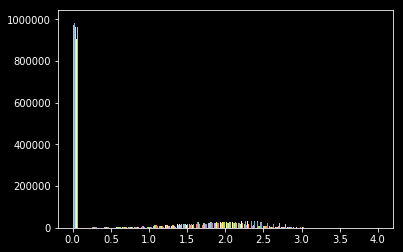

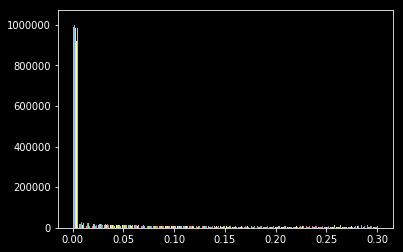

In [33]:
plt.hist(np.log10(vectors+1),bins=50)
plt.show()
plt.hist(np.log10(normvectors+1),bins=50)
plt.show()

In [35]:
normvector = normvectors[1:10,:]
normvector

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.39923774, 0.        , 0.        , 0.21958076, 0.        ,
        0.        , 0.75855171, 0.        , 0.33269812, 0.        ,
        0.        , 0.        , 0.32604415],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.95670721, 0.        , 0.        , 0.01760811, 0.        ,
        0.        , 0.        , 0.        , 0.2875991 , 0.        ,
        0.        , 0.        , 0.04108559],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.98389139, 0.        , 0.09307081, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.13739024, 0.        ,
        0.06647915, 0.        , 0.        ],
       [0.        , 0.        , 0.04282006, 0.        , 0.        ,
        0.66065241, 0.        , 0.29362329, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.07952298, 0.        ,
        0.65453526, 0.        , 0.20186601],
    

In [36]:
vector = vectors[1:10,:]
vector

array([[  0.,   0.,   0.,   0.,   0.,  60.,   0.,   0.,  33.,   0.,   0.,
        114.,   0.,  50.,   0.,   0.,   0.,  49.],
       [  0.,   0.,   0.,   0.,   0., 163.,   0.,   0.,   3.,   0.,   0.,
          0.,   0.,  49.,   0.,   0.,   0.,   7.],
       [  0.,   0.,   0.,   0.,   0., 222.,   0.,  21.,   0.,   0.,   0.,
          0.,   0.,  31.,   0.,  15.,   0.,   0.],
       [  0.,   0.,   7.,   0.,   0., 108.,   0.,  48.,   0.,   0.,   0.,
          0.,   0.,  13.,   0., 107.,   0.,  33.],
       [  0.,  63.,   0.,   0.,  97.,   0.,   0.,  12.,   0.,   0.,   0.,
          0.,   0.,  11.,   0.,  85.,   0., 156.],
       [  0., 152.,   0.,   0., 191.,   0.,   0.,   0.,  13.,   0.,   0.,
          0.,   0.,  36., 197.,   0.,   0., 312.],
       [  0.,  37.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        294.,   0.,   0.,   0.,   0., 444., 246.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        254.,   0.,   0.,   0.,   0., 454., 124.],


In [ ]:
plt.savefig()